In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_regression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets
import pandas as pd 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import validation_curve

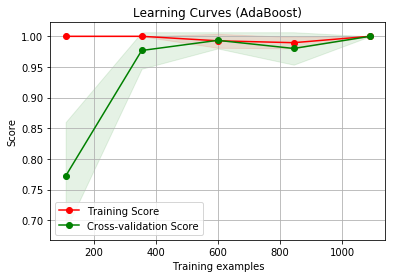

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from hw1_util import create_two_spirals, get_hill_valley_data


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    #if ylim is not None:
    #    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring="r2")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation Score")

    plt.legend(loc="best")
    return plt


# X, y = create_two_spirals()
X, y = get_hill_valley_data()

# title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

# title = "Learning Curves (Decision Tree)"
cv = 10
# estimator = DecisionTreeClassifier(max_depth=5)
# plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

# title = "Learning Curves (MPLClassifier)"
# estimator = MLPClassifier(hidden_layer_sizes=(100, 20))
# plot_learning_curve(estimator, title, X, y, (0.6, 1.01), cv=cv, n_jobs=4)
#
title = "Learning Curves (AdaBoost)"
estimator = AdaBoostClassifier(base_estimator=LogisticRegression())
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)
#
# title = "Learning Curves (SVM Linear Kernel)"
# estimator = SVC(kernel="linear", C=0.025)
# plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

# title = "Learning Curves (SVM RBF Kernel)"
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
# estimator = SVC()
# plot_learning_curve(estimator, title, X, y, (0.9, 1.01), cv=cv, n_jobs=1)

# title = "Learning Curves (k-Nearest Neighbors)"
# estimator = KNeighborsClassifier(3)
# plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

plt.show()

# Learning curves 


In [33]:
## THIS TAKES LONG TIME

X,y,coef= make_regression(n_samples=2000, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=50, shuffle=True, coef=True, random_state=None)

#preprocess data

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') {'max_depth': [10, 50, 100, 150, 200, 300, 400], 'splitter': ('best', 'random'), 'criterion': ('mse', 'friedman_mse', 'mae')}
{'criterion': 'mse', 'max_depth': 10, 'splitter': 'random'}


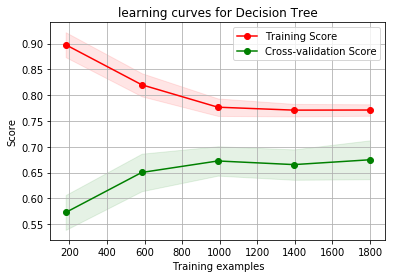

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) {'hidden_layer_sizes': [(10,), (5,), (20,)], 'learning_rate_init': [0.001, 0.01, 0.01], 'activation': ('identity', 'logistic', 'tanh', 'relu')}
{'activation': 'identity', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}


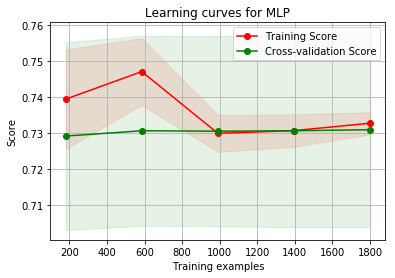

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=200, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=0) {'n_estimators': [20, 50, 100, 200]}
{'n_estimators': 20}


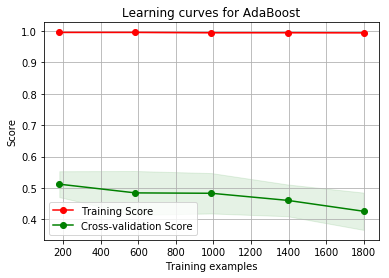

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) {'kernel': ('linear', 'rbf'), 'C': [0.1, 1.0, 10.0, 100.0, 1000.0]}
{'C': 1000.0, 'kernel': 'linear'}


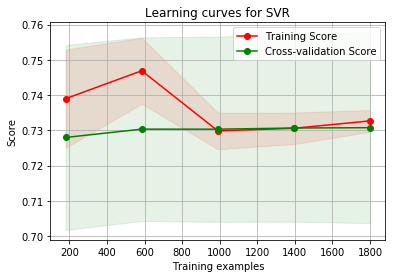

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') {'n_neighbors': [5, 10, 20, 30, 40], 'weights': ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}
{'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'uniform'}


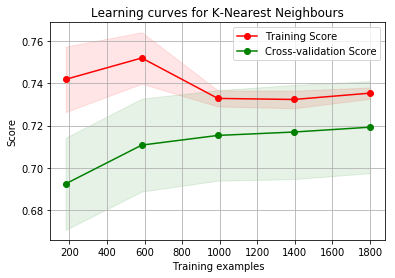

[0.6561983018999125, 0.7194583010147895, 0.37835250116259656, 0.7201169988676859, 0.7059813425088445]
[0.6943006912356565, 0.7394202000376833, 0.47367460789135396, 0.739462590107276, 0.7298128023981593]


In [34]:
## Decision tree, MLP, Adaboost, SVR, KNeighbor
regressors = [   
    #(LinearRegression(),{'learning_rate':[0.001,0.01,0.1]})
    (DecisionTreeRegressor(),{'max_depth':[10,50,100,150,200,300,400],'splitter':('best','random'),'criterion':('mse','friedman_mse','mae')}),
    (MLPRegressor(hidden_layer_sizes=(10, ),learning_rate_init=0.01),{'hidden_layer_sizes':[(10,),(5,),(20,)],\
            'learning_rate_init':[0.001,0.01,0.01],'activation':('identity','logistic','tanh','relu')}),
    (AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0),{'n_estimators':[20,50,100,200]}),
    (SVR(gamma='scale'),{'kernel':('linear', 'rbf'), 'C':[1e-1,1e0, 1e1, 1e2, 1e3]}),
    (KNeighborsRegressor(),{'n_neighbors':[5,10,20,30,40],'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')})
]

titles=['learning curves for Decision Tree','Learning curves for MLP','Learning curves for AdaBoost',\
        'Learning curves for SVR','Learning curves for K-Nearest Neighbours']

train_scores=[]
test_scores=[]
i=0

for reg,parameters in regressors:
    #reg.fit(X_train,y_train)
    #score=reg.score(X_test,y_test)
    print (reg,parameters)
    clf = GridSearchCV(reg, param_grid=parameters,cv=10)
    with ignore_warnings(category=ConvergenceWarning):
        clf.fit(X_train, y_train)
    print (clf.best_params_)
    train_score=clf.best_score_
    train_scores.append(train_score)
    test_score=clf.best_estimator_.score(X_test,y_test)
    test_scores.append(test_score)
    title=titles[i]    
    plot_learning_curve(clf, title, X, y, (0.8, 1.01), cv=10, n_jobs=-1)
    plt.show()
    i+=1

    
print (train_scores)
print (test_scores)



# validation curves FOR Separate regressors

In [ ]:
y

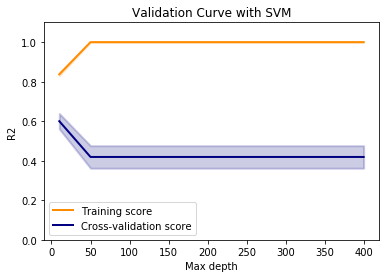

In [35]:
#1 Decision Tree
param_range=[10, 50, 100, 150, 200, 300, 400]
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, param_name="max_depth", param_range=param_range,cv=10, scoring="r2", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("Max depth")
plt.ylabel("R2")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

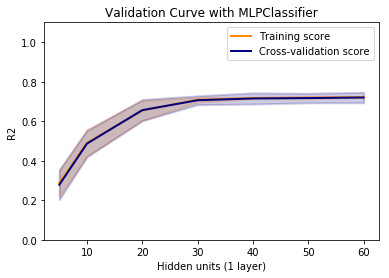

In [36]:
#2 MLP 

param_range = [(5, ), (10, ), (20, ), (30, ), (40, ), (50, ), (60, )]
train_scores, test_scores = validation_curve(
    MLPRegressor(), X, y, param_name="hidden_layer_sizes", param_range=param_range,
    cv=10, scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with MLPClassifier")
plt.xlabel("Hidden units (1 layer)")
plt.ylabel("R2")
plt.ylim(0.0, 1.1)
lw = 2

param_range = [5,10,20,30,40,50, 60]
plt.plot(param_range, train_scores_mean, label="Training score",
              color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
              color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.2,
                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

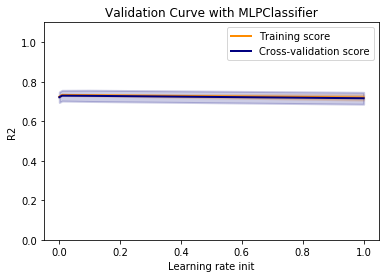

In [37]:
param_range=[0.001,0.01,0.1,1]
train_scores, test_scores = validation_curve(
    MLPRegressor(), X, y, param_name="learning_rate_init", param_range=param_range,
    cv=10, scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with MLPClassifier")
plt.xlabel("Learning rate init")
plt.ylabel("R2")
plt.ylim(0.0, 1.1)
lw = 2

param_range = [0.001,0.01,0.1,1]
plt.plot(param_range, train_scores_mean, label="Training score",
              color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
              color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.2,
                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

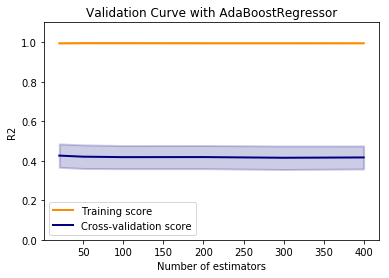

In [41]:
#3 AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0),{'n_estimators':[20,50,100,200]}),

param_range=[20,50,100,200,300,400]
train_scores, test_scores = validation_curve(
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0), X, y, param_name="n_estimators", param_range=param_range,
    cv=10, scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with AdaBoostRegressor")
plt.xlabel("Number of estimators")
plt.ylabel("R2")
plt.ylim(0.0, 1.1)
lw = 2


plt.plot(param_range, train_scores_mean, label="Training score",
              color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
              color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.2,
                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

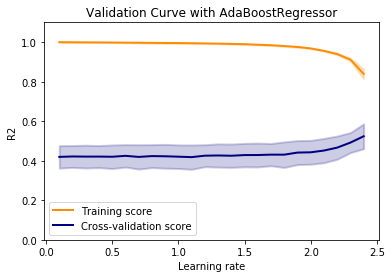

In [45]:
param_range = np.arange(0.1, 2.5, 0.1)
train_scores, test_scores = validation_curve(
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0), X, y, param_name="learning_rate", param_range=param_range,
    cv=10, scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with AdaBoostRegressor")
plt.xlabel("Learning rate")
plt.ylabel("R2")
plt.ylim(0.0, 1.1)
lw = 2


plt.plot(param_range, train_scores_mean, label="Training score",
              color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
              color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.2,
                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

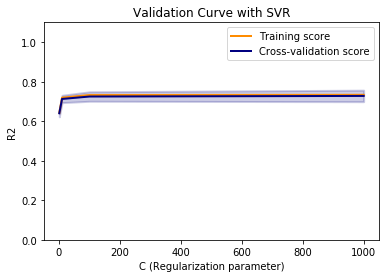

In [42]:
#4 (SVR(gamma='scale'),{'kernel':('linear', 'rbf'), 'C':[1e0, 1e1, 1e2, 1e3]})

param_range=[1e0,1e1,1e2,1e3]
train_scores, test_scores = validation_curve(
    SVR(gamma='scale'), X, y, param_name="C", param_range=param_range,
    cv=10, scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVR")
plt.xlabel("C (Regularization parameter)")
plt.ylabel("R2")
plt.ylim(0.0, 1.1)
lw = 2


plt.plot(param_range, train_scores_mean, label="Training score",
              color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
              color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.2,
                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

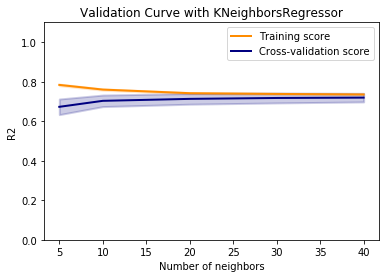

In [43]:
#5 (KNeighborsRegressor(),{'n_neighbors':[5,10,20,30,40],'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}

param_range=[5,10,20,30,40]
train_scores, test_scores = validation_curve(
    KNeighborsRegressor(), X, y, param_name="n_neighbors", param_range=param_range,
    cv=10, scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNeighborsRegressor")
plt.xlabel("Number of neighbors")
plt.ylabel("R2")
plt.ylim(0.0, 1.1)
lw = 2


plt.plot(param_range, train_scores_mean, label="Training score",
              color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
              color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.2,
                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

   # Regression  

## regression using different classifiers
_1 linear relationship 

In [63]:
X,y,coef = make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=0.0, shuffle=True, coef=True, random_state=None)

#preprocess data
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
regressors = [   
    #(LinearRegression(),{'learning_rate':[0.001,0.01,0.1]})
    (DecisionTreeRegressor(),{'max_depth':[10,50,100,150,200,300,400],'splitter':('best','random'),'criterion':('mse','friedman_mse','mae')}),
    (MLPRegressor(hidden_layer_sizes=(10, ),learning_rate_init=0.01),{'hidden_layer_sizes':[(10,),(5,),(20,)],\
            'learning_rate_init':[0.001,0.01,0.01],'activation':('identity','logistic','tanh','relu')}),
    (AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0),{'n_estimators':[20,50,100,200]}),
    (SVR(gamma='scale'),{'kernel':('linear', 'rbf'), 'C':[1e0, 1e1, 1e2, 1e3]}),
    (KNeighborsRegressor(),{'n_neighbors':[5,10,20,30,40],'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')})
]

train_scores=[]
test_scores=[]

for reg,parameters in regressors:
    #reg.fit(X_train,y_train)
    #score=reg.score(X_test,y_test)
    print (reg,parameters)
    clf = GridSearchCV(reg, param_grid=parameters,cv=10)
    with ignore_warnings(category=ConvergenceWarning):
        clf.fit(X_train, y_train)
    print (clf.best_params_)
    train_score=clf.best_score_
    train_scores.append(train_score)
    test_score=clf.best_estimator_.score(X_test,y_test)
    test_scores.append(test_score)

    
print (train_scores)
print (test_scores)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') {'max_depth': [10, 50, 100, 150, 200, 300, 400], 'splitter': ('best', 'random'), 'criterion': ('mse', 'friedman_mse', 'mae')}
{'criterion': 'mse', 'max_depth': 10, 'splitter': 'best'}
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) {'hidden_layer_sizes': [(10,), (5,), (20,)], 'learn

#  regression using different classifiers
_2 non linear 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') {'max_depth': [10, 50, 100, 150, 200, 300, 400], 'splitter': ('best', 'random'), 'criterion': ('mse', 'friedman_mse', 'mae')}
{'criterion': 'mae', 'max_depth': 50, 'splitter': 'best'}
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) {'hidden_layer_sizes': [(10,), (5,), (20,)], 'learn

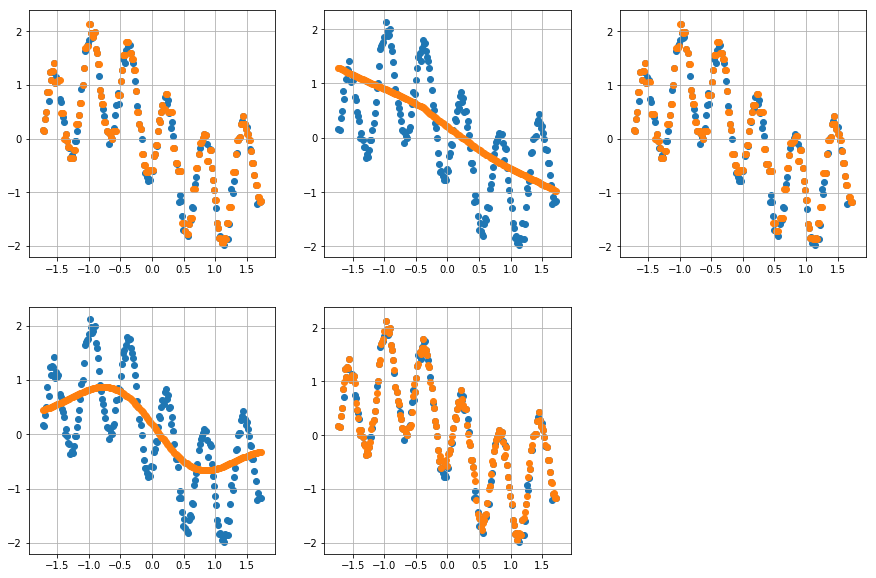

In [95]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

#preprocess data
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

train_scores=[]
test_scores=[]
predict_ys=[]

for reg,parameters in regressors:
    #reg.fit(X_train,y_train)
    #score=reg.score(X_test,y_test)
    print (reg,parameters)
    clf = GridSearchCV(reg, param_grid=parameters,cv=10)
    with ignore_warnings(category=ConvergenceWarning):
        clf.fit(X_train, y_train)
    print (clf.best_params_)
    train_score=clf.best_score_
    train_scores.append(train_score)
    test_score=clf.best_estimator_.score(X_test,y_test)
    test_scores.append(test_score)
    predict_ys.append(clf.predict(X))

    
print (train_scores)
print (test_scores)

###plot predictions 
plt.figure(figsize=(15,10))
for i in range(5):
    
    plt.subplot(2,3,i+1)
    plt.scatter(X,y)
    plt.scatter(X,predict_ys[i])
    plt.grid(True)

# regression using different classifiers
__3 colinear features 

In [77]:
X,y,coef = make_regression(n_samples=200, n_features=4, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=0.0, shuffle=True, coef=True, random_state=None)

#preprocess data
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    #from sklearn.tree import DecisionTreeRegressor
    #X, y = load_boston(return_X_y=True)
    #regressor = DecisionTreeRegressor(random_state=0)
    #cross_val_score(regressor, X, y, cv=10)
    


regressors = [   
    #(LinearRegression(),{'learning_rate':[0.001,0.01,0.1]})
    (DecisionTreeRegressor(),{'max_depth':[10,50,100,150,200,300,400],'splitter':('best','random'),'criterion':('mse','friedman_mse','mae')}),
    (MLPRegressor(hidden_layer_sizes=(10, ),learning_rate_init=0.01),{'hidden_layer_sizes':[(10,),(5,),(20,)],\
            'learning_rate_init':[0.001,0.01,0.01],'activation':('identity','logistic','tanh','relu')}),
    (AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0),{'n_estimators':[20,50,100,200]}),
    (SVR(gamma='scale'),{'kernel':('linear', 'rbf'), 'C':[1e0, 1e1, 1e2, 1e3]}),
    (KNeighborsRegressor(),{'n_neighbors':[5,10,20,30,40],'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')})
]

train_scores=[]
test_scores=[]
predict_ys=[]

for reg,parameters in regressors:
    #reg.fit(X_train,y_train)
    #score=reg.score(X_test,y_test)
    print (reg,parameters)
    clf = GridSearchCV(reg, param_grid=parameters,cv=10)
    with ignore_warnings(category=ConvergenceWarning):
        clf.fit(X_train, y_train)
    print (clf.best_params_)
    train_score=clf.best_score_
    train_scores.append(train_score)
    test_score=clf.best_estimator_.score(X_test,y_test)
    test_scores.append(test_score)
    predict_ys.append(clf.predict(X))
    
print (train_scores)
print (test_scores)


###plot predictions 
#plt.figure(figsize=(15,10))
#for i in range(5):
    
#    plt.subplot(2,2,i)
#    plt.scatter(X,y)
#    plt.scatter(X,predcit_ys[i])
#    plt.grid(True)
    
    

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') {'max_depth': [10, 50, 100, 150, 200, 300, 400], 'splitter': ('best', 'random'), 'criterion': ('mse', 'friedman_mse', 'mae')}
{'criterion': 'friedman_mse', 'max_depth': 200, 'splitter': 'best'}
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) {'hidden_layer_sizes': [(10,), (5,), (20,

# regression using different classifiers
__ 4 outliners 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') {'max_depth': [10, 50, 100, 150, 200, 300, 400], 'splitter': ('best', 'random'), 'criterion': ('mse', 'friedman_mse', 'mae')}
{'criterion': 'friedman_mse', 'max_depth': 400, 'splitter': 'random'}
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) {'hidden_layer_sizes': [(10,), (5,), (2

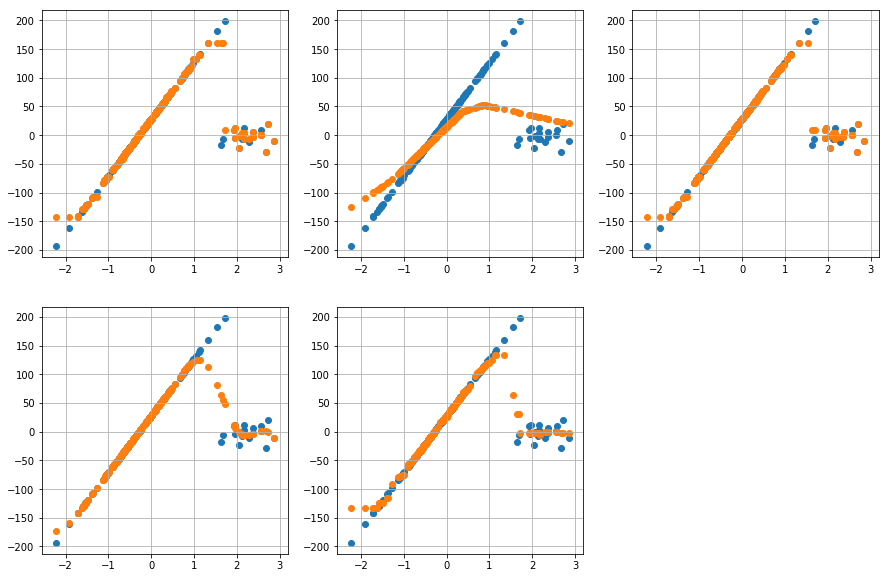

In [91]:
X,y,coef = make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=0.0, shuffle=True, coef=True, random_state=None)

n_outliers = 20 

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)


X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)


regressors = [   
    #(LinearRegression(),{'learning_rate':[0.001,0.01,0.1]})
    (DecisionTreeRegressor(),{'max_depth':[10,50,100,150,200,300,400],'splitter':('best','random'),'criterion':('mse','friedman_mse','mae')}),
    (MLPRegressor(hidden_layer_sizes=(10, ),learning_rate_init=0.01),{'hidden_layer_sizes':[(10,),(5,),(20,)],\
            'learning_rate_init':[0.001,0.01,0.01],'activation':('identity','logistic','tanh','relu')}),
    (AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0),{'n_estimators':[20,50,100,200]}),
    (SVR(gamma='scale'),{'kernel':('linear', 'rbf'), 'C':[1e0, 1e1, 1e2, 1e3]}),
    (KNeighborsRegressor(),{'n_neighbors':[5,10,20,30,40],'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')})
]

train_scores=[]
test_scores=[]
predict_ys=[]

for reg,parameters in regressors:
    #reg.fit(X_train,y_train)
    #score=reg.score(X_test,y_test)
    print (reg,parameters)
    clf = GridSearchCV(reg, param_grid=parameters,cv=10)
    with ignore_warnings(category=ConvergenceWarning):
        clf.fit(X_train, y_train)
    print (clf.best_params_)
    train_score=clf.best_score_
    train_scores.append(train_score)
    test_score=clf.best_estimator_.score(X_test,y_test)
    test_scores.append(test_score)
    predict_ys.append(clf.predict(X))


    
print (train_scores)
print (test_scores)

###plot predictions 
plt.figure(figsize=(15,10))
for i in range(5):
    
    plt.subplot(2,3,i+1)
    plt.scatter(X,y)
    plt.scatter(X,predict_ys[i])
    plt.grid(True)

# regression using different classifiers
__ noises 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') {'max_depth': [10, 50, 100, 150, 200, 300, 400], 'splitter': ('best', 'random'), 'criterion': ('mse', 'friedman_mse', 'mae')}
{'criterion': 'friedman_mse', 'max_depth': 10, 'splitter': 'random'}
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) {'hidden_layer_sizes': [(10,), (5,), (20

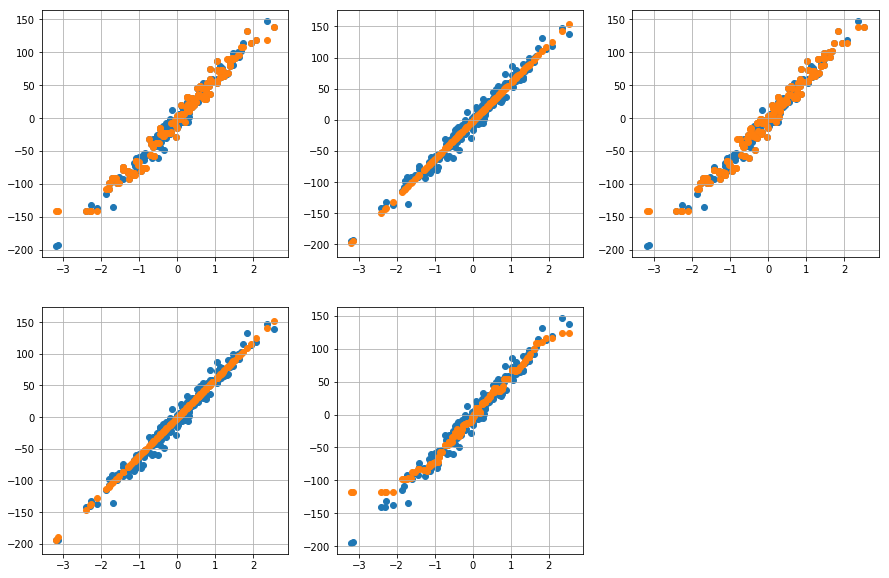

In [99]:
X,y,coef = make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=10, shuffle=True, coef=True, random_state=None)



X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)


regressors = [   
    #(LinearRegression(),{'learning_rate':[0.001,0.01,0.1]})
    (DecisionTreeRegressor(),{'max_depth':[10,50,100,150,200,300,400],'splitter':('best','random'),'criterion':('mse','friedman_mse','mae')}),
    (MLPRegressor(hidden_layer_sizes=(10, ),learning_rate_init=0.01),{'hidden_layer_sizes':[(10,),(5,),(20,)],\
            'learning_rate_init':[0.001,0.01,0.01],'activation':('identity','logistic','tanh','relu')}),
    (AdaBoostRegressor(DecisionTreeRegressor(max_depth=200),random_state=0),{'n_estimators':[20,50,100,200]}),
    (SVR(gamma='scale'),{'kernel':('linear', 'rbf'), 'C':[1e0, 1e1, 1e2, 1e3]}),
    (KNeighborsRegressor(),{'n_neighbors':[5,10,20,30,40],'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')})
]

train_scores=[]
test_scores=[]
predict_ys=[]

for reg,parameters in regressors:
    #reg.fit(X_train,y_train)
    #score=reg.score(X_test,y_test)
    print (reg,parameters)
    clf = GridSearchCV(reg, param_grid=parameters,cv=10)
    with ignore_warnings(category=ConvergenceWarning):
        clf.fit(X_train, y_train)
    print (clf.best_params_)
    train_score=clf.best_score_
    train_scores.append(train_score)
    test_score=clf.best_estimator_.score(X_test,y_test)
    test_scores.append(test_score)
    predict_ys.append(clf.predict(X))

    
print (train_scores)
print (test_scores)


###plot predictions 
plt.figure(figsize=(15,10))
for i in range(5):
    
    plt.subplot(2,3,i+1)
    plt.scatter(X,y)
    plt.scatter(X,predict_ys[i])
    plt.grid(True)
